# Computer Problem Set 2.2
## Girsanov Theorem

### Question 1

We use the Monte-Carlo method with

$$
\Delta_0 = \mathbb{P}[S_T \ge K]
$$
where $S$ has the dynamique $dS_t = S_t(rdt + \sigma dB_t)$

We have $S_T = S_0e^{(r-\frac{\sigma^2}{2})T + \sigma B_T}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation of Delta0 by (1)
def Delta0_1(r, sigma, S0, T, K, M, n=1):
    '''
    We simply simulate the B_T, then S_T = S_0 * exp(...)
    '''
    DeltaT = T / n
    # Simulate Brownian motion
    samples_brownian = np.random.normal(0.0, np.sqrt(DeltaT), size=(M, n + 1))
    samples_brownian[:, 0] = 0
    samples_brownian = samples_brownian.cumsum(axis=1)
    
    # Then we get S_T
    S_T = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * samples_brownian[:, -1])
    
    # We return the probability of S_T being greater than K
    return np.mean(S_T > K)

In [2]:
r = 0.02
sigma = 0.4
S0 = 100
T = 2
K = 150
M = 1000
n = 10
Delta0_1(r, sigma, S0, T, K, M, n)

0.174

### Question 2

We have $S_T = S_0e^{(r-\frac{\sigma^2}{2})T + \sigma B_T}$

In [3]:
def Delta0_2(r, sigma, S0, T, K, M, theta, n=1):
    '''
    We simply simulate the B_T under Q, then S_T = S_0 * exp(...)
    '''
    DeltaT = T / n
    # Simulate Brownian motion
    samples_brownian = np.random.normal(0.0, np.sqrt(DeltaT), size=(M, n + 1))
    samples_brownian[:, 0] = 0
    samples_brownian = samples_brownian.cumsum(axis=1)
    
    # Under Q, B_T is equal to a brownian motion plus theta*T
    B_T = samples_brownian[:, -1] + theta * T
    
    # Then we get S_T
    S_T = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * B_T)
    
    # We return the probability of S_T being greater than K
    # Divided by the factor Z^theta
    Ztheta = np.exp(theta * B_T - theta ** 2 * T / 2)
    return np.mean((S_T > K) / Ztheta)

In [4]:
theta = 0.5
Delta0_2(r, sigma, S0, T, K, M, theta, n)

0.18024924110085247

### Question 3

We simply plot the graph for $\theta$ in $[-3, 3]$ with step = 0.1, $M = 1000$.

For the theorical value, we write :
$$
\mathbb{P}(S_0e^{(r - \frac{\sigma^2}{2})T + \sigma B_T} \ge K)
$$
$$
= \mathbb{P}(B_T \ge \frac{ln(\frac{K}{S_0}) - (r - \frac{\sigma^2}{2})T}{\sigma})
$$
with $B_T \sim \mathcal{N}(0, T)$

In [5]:
from scipy import stats
theorical_value = 1 - stats.norm().cdf((np.log(K/S0) - (r - sigma ** 2 / 2) * T)/ sigma / np.sqrt(T))

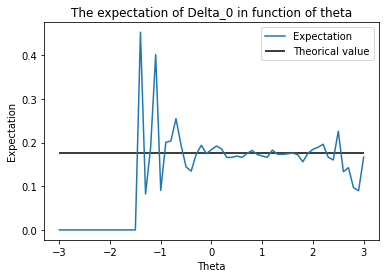

In [6]:
expectations = []
for theta in np.linspace(-3, 3, 61, endpoint=True):
    expectations.append(Delta0_2(r, sigma, S0, T, K, M, theta, n))

plt.plot(np.linspace(-3, 3, 61, endpoint=True), expectations, label="Expectation")
plt.hlines(theorical_value, xmin=-3, xmax=3, label="Theorical value")
plt.xlabel("Theta")
plt.ylabel("Expectation")
plt.title("The expectation of Delta_0 in function of theta")
plt.legend(loc="best")

The fact that we change the probability measure introduce the effect of importance sampling. However, if we have $\theta$ smaller, then the evenement $S_T > K$ can not even be detected. We thus have an expectation 0 at the end.

At the same time, with $\theta$ bigger, we have $S_T > K$ almost every time and we can not count on this expectation. We get the variance of $S^\theta$ for the source of the error.

### Question 4

We simply reuse the code in Question 3., where we divide by $Z^{2\theta}$ at the end, then minus $\Delta_0^2$

In [7]:
def V_theta(r, sigma, S0, T, K, M, theta, n=1):
    '''
    We simply simulate the B_T under Q, then S_T = S_0 * exp(...)
    '''
    DeltaT = T / n
    # Simulate Brownian motion
    samples_brownian = np.random.normal(0.0, np.sqrt(DeltaT), size=(M, n + 1))
    samples_brownian[:, 0] = 0
    samples_brownian = samples_brownian.cumsum(axis=1)
    
    # Under Q, B_T is equal to a brownian motion plus theta*T
    B_T = samples_brownian[:, -1] + theta * T
    
    # Then we get S_T
    S_T = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * B_T)
    
    # We return the probability of S_T being greater than K
    # Divided by the factor Z^theta
    Ztheta = np.exp(theta * B_T - theta ** 2 * T / 2)
    return np.var((S_T > K) / Ztheta)

### Question 5

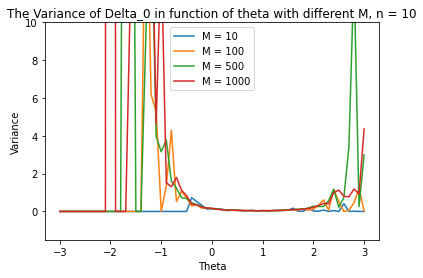

In [8]:
def Question5(n):
    for M in [10, 100, 500, 1000]:
        expectations = []
        for theta in np.linspace(-3, 3, 61, endpoint=True):
            expectations.append(V_theta(r, sigma, S0, T, K, M, theta, n))

        plt.plot(np.linspace(-3, 3, 61, endpoint=True), expectations, label="M = {}".format(M))
    plt.xlabel("Theta")
    plt.ylabel("Variance")
    plt.title("The Variance of Delta_0 in function of theta with different M, n = {}".format(n))
    plt.ylim(-1.5, 10)
    plt.legend(loc="best")
Question5(n)

This is another illustration on the effect of changing the probability measure. We have $V^\theta$ tends to 0 with $\theta$ smaller (Every time we get 0). At the same time, when we have more sample (M greater), there will be the chance that the evenement $S_T > K$ be observed. The variance is then very big since $Z^\theta$ is very small.

The zone $[0, 2]$ is stable.

For $\theta > 2$, it's the variance of $Z^\theta$ himself who causes the great variance of $V^\theta$.